Para una imagen de su elección:
1. Construir un espacio de características basado en color
2. Construir un espacio de características basado en color y posición.
Ejemplo: 𝑋 ത = (𝑅, 𝐺, 𝐵, 𝑥, 𝑦) (pueden experimentar con otros espacios de
color o usar escala de grises)
3. Graficar la distribución de características para ambos espacios
4. Obtener la imagen posterizada y las mascaras correspondientes a cada
clase, utilizando k-means con asignación aleatoria de centroides, para
ambos espacios de características
5. Comparar todos los resultados obtenidos

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

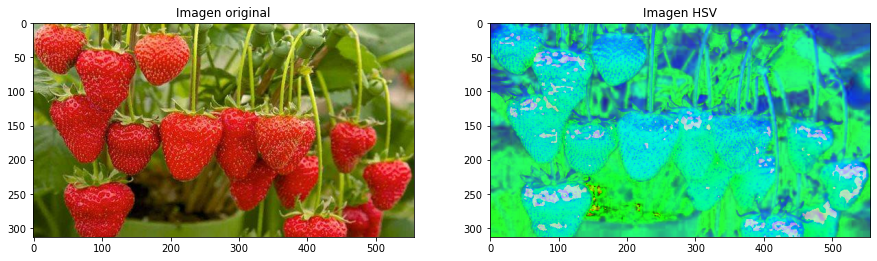

Tamaño imagen RGB: (313, 556, 3)
Tamaño imagen HSV: (313, 556, 3)


In [2]:
imagen = cv.imread('frutillas1.jpg')
imagen_RGB = cv.cvtColor(imagen,cv.COLOR_BGR2RGB)
imagen_HSV = cv.cvtColor(imagen,cv.COLOR_BGR2HSV)

figura = plt.figure(figsize = (15,15))
ax1 = figura.add_subplot(1, 2, 1)
ax1.imshow(imagen_RGB)
ax1.set_title('Imagen original'.format(imagen_RGB))
ax2 = figura.add_subplot(1, 2, 2)
ax2.imshow(imagen_HSV)
ax2.set_title('Imagen HSV'.format(imagen_HSV))
plt.show()

print('Tamaño imagen RGB:',imagen_RGB.shape)
print('Tamaño imagen HSV:',imagen_HSV.shape)


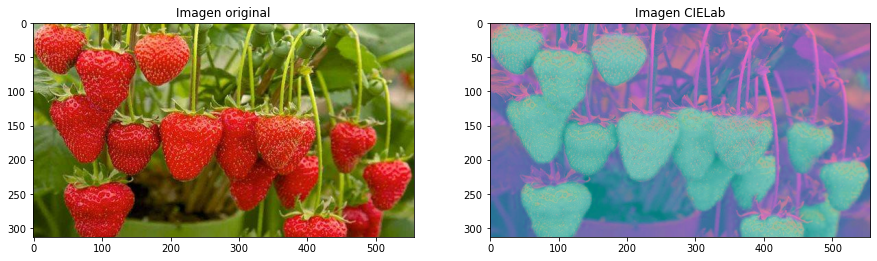

In [3]:
imgLab = cv.cvtColor(imagen, cv.COLOR_BGR2Lab)
figura = plt.figure(figsize = (15,15))
ax1 = figura.add_subplot(1, 2, 1)
ax1.imshow(imagen_RGB)
ax1.set_title('Imagen original'.format(imagen_RGB))
ax2 = figura.add_subplot(1, 2, 2)
ax2.imshow(imgLab)
ax2.set_title('Imagen CIELab'.format(imgLab))
plt.show()

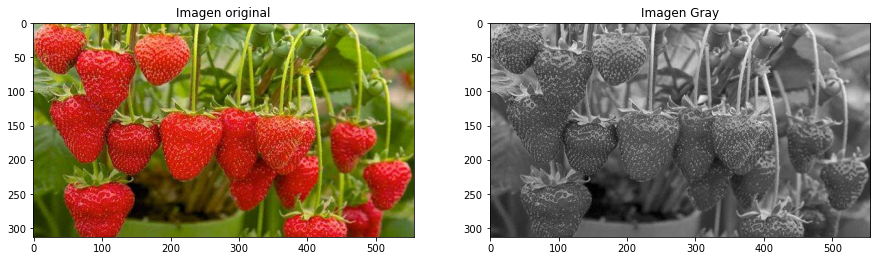

In [4]:
img_gray = cv.cvtColor(imagen_RGB, cv.COLOR_RGB2GRAY)
figura = plt.figure(figsize = (15,15))
ax1 = figura.add_subplot(1, 2, 1)
ax1.imshow(imagen_RGB)
ax1.set_title('Imagen original'.format(imagen_RGB))
ax2 = figura.add_subplot(1, 2, 2)
ax2.imshow(img_gray,cmap='gray')
ax2.set_title('Imagen Gray'.format(img_gray))
plt.show()

In [5]:
x = np.repeat(np.arange(1,img_gray.shape[1]+1,1).reshape(1,img_gray.shape[1]), img_gray.shape[0], axis = 0)
y = np.repeat(np.arange(1,img_gray.shape[0]+1,1).reshape(img_gray.shape[0],1), img_gray.shape[1], axis = 1)

cord_gray_xy = np.stack((img_gray/255, x/x.max(), y/y.max()), axis = 2)

In [6]:
print('Imagen Gray con X-Y: ',cord_gray_xy.shape)

Imagen Gray con X-Y:  (313, 556, 3)


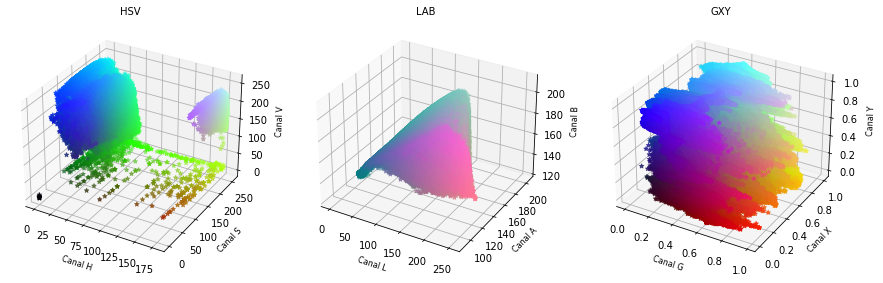

In [7]:
H, S, V = cv.split(imagen_HSV)
fig = plt.figure(figsize = (15,15))
axis = fig.add_subplot(1,3,1, projection="3d")
pixel_colors = imagen_HSV.reshape((np.shape(imagen_HSV)[0]*np.shape(imagen_HSV)[1], 3))
norm = colors.Normalize(vmin=-1,vmax=1)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(H.flatten(), S.flatten(), V.flatten(), facecolors=pixel_colors, marker="*")
axis.set_xlabel("Canal H", fontsize = 8)
axis.set_ylabel("Canal S", fontsize = 8)
axis.set_zlabel("Canal V", fontsize = 8)
axis.set_title("HSV", fontsize = 10)

L, A, B = cv.split(imgLab)
axis = fig.add_subplot(1,3,2, projection="3d")
pixel_colors = imgLab.reshape((np.shape(imgLab)[0]*np.shape(imgLab)[1], 3))
norm = colors.Normalize(vmin=-1,vmax=1)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(L.flatten(), A.flatten(), B.flatten(), facecolors=pixel_colors, marker="*")
axis.set_xlabel("Canal L", fontsize = 8)
axis.set_ylabel("Canal A", fontsize = 8)
axis.set_zlabel("Canal B", fontsize = 8)
axis.set_title("LAB", fontsize = 10)

g, x, y = cv.split(cord_gray_xy)
axis = fig.add_subplot(1,3,3, projection="3d")
pixel_colors = cord_gray_xy.reshape((np.shape(cord_gray_xy)[0]*np.shape(cord_gray_xy)[1], 3))
norm = colors.Normalize(vmin=-1,vmax=1)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(g.flatten(), x.flatten(), y.flatten(), facecolors=pixel_colors, marker="*")
axis.set_xlabel("Canal G", fontsize = 8)
axis.set_ylabel("Canal X", fontsize = 8)
axis.set_zlabel("Canal Y", fontsize = 8)
axis.set_title("GXY", fontsize = 10)
plt.show()

In [8]:
print('Tamaño imagen HSV:',imagen_HSV.shape)

Tamaño imagen HSV: (313, 556, 3)


In [9]:
#Defino dimensión del espacio features

features_HSV=imagen_HSV.reshape(-1,3)
features_LAB=imgLab.reshape(-1,3)
print('Forma features HSV:',features_HSV.shape)
print('Forma features LAB:',features_LAB.shape)

Forma features HSV: (174028, 3)
Forma features LAB: (174028, 3)


In [10]:
features_HSV = np.float32(features_HSV)
K = 3 # cantidad de clusters
criterios_HSV = (cv.TERM_CRITERIA_MAX_ITER + cv.TERM_CRITERIA_EPS, 20, 1.0)
compact_HSV, label_HSV, color_clusters_HSV= cv.kmeans(features_HSV, K, None, criterios_HSV, 20, cv.KMEANS_RANDOM_CENTERS)
color_clusters_HSV = np.uint8(color_clusters_HSV)
print(f'Centroides HSV: \n {color_clusters_HSV} \n')

compact_HSV = np.uint8(compact_HSV)
print('Compactación HSV: \n {} \n'.format(compact_HSV))
label_HSV[:4]

Centroides HSV: 
 [[ 55 135 173]
 [ 30 231  98]
 [  7 220 190]] 

Compactación HSV: 
 228 



array([[0],
       [0],
       [0],
       [0]], dtype=int32)

In [11]:
features_LAB = np.float32(features_LAB)
K = 3 # cantidad de clusters
opciones_LAB = (cv.TERM_CRITERIA_MAX_ITER + cv.TERM_CRITERIA_EPS, 20, 1.0)
compact_LAB, label_LAB, color_clusters_LAB= cv.kmeans(features_LAB, K, None, opciones_LAB, 20, cv.KMEANS_RANDOM_CENTERS)
color_clusters_LAB = np.uint8(color_clusters_LAB)
print(f'Centroides LAB: \n {color_clusters_LAB} \n')

compact_LAB = np.uint8(compact_LAB)
print('Compactación LAB: \n {} \n'.format(compact_LAB))
label_LAB[:4]

Centroides LAB: 
 [[161 113 171]
 [ 88 116 165]
 [109 183 172]] 

Compactación LAB: 
 26 



array([[0],
       [0],
       [0],
       [0]], dtype=int32)

Text(0.5, 1.0, 'Posterizado LAB')

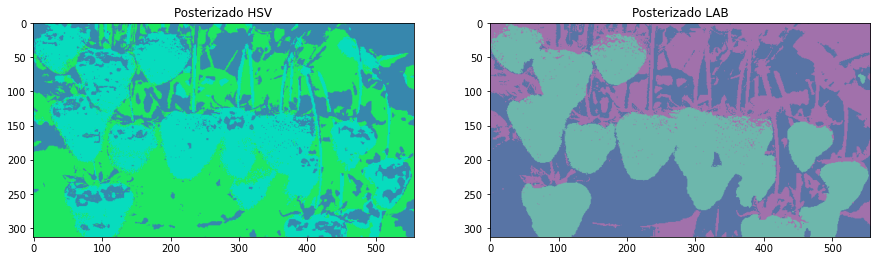

In [12]:
resultado_HSV = color_clusters_HSV[label_HSV.flatten()]
resultado_HSV = resultado_HSV.reshape((imagen_HSV.shape))
resultado_LAB = color_clusters_LAB[label_LAB.flatten()]
resultado_LAB = resultado_LAB.reshape((imgLab.shape))

figura = plt.figure(figsize = (15,15))
ax1 = figura.add_subplot(1, 2, 1)
ax1.imshow(resultado_HSV)
ax1.set_title('Posterizado HSV'.format(resultado_HSV))
ax2 = figura.add_subplot(1, 2, 2)
ax2.imshow(resultado_LAB)
ax2.set_title('Posterizado LAB'.format(resultado_LAB))

In [13]:
print('Imagen Gray con X-Y: ',cord_gray_xy.shape)

Imagen Gray con X-Y:  (313, 556, 3)


In [14]:
#Defino dimensión del espacio features

features_Gray=cord_gray_xy.reshape(-1,3)
print('Forma features Gray_XY:',features_Gray.shape)

Forma features Gray_XY: (174028, 3)


In [15]:
features_Gray = np.float32(features_Gray)
criteria = (cv.TERM_CRITERIA_MAX_ITER + cv.TERM_CRITERIA_EPS, 10, 1.0)
K = 3
compact_gray, label_gray, clusters_gray = cv.kmeans(features_Gray, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
x=x*255
x=np.int64(x)
normaliz = np.array([255, x.max(), y.max()])
#print(WW)
clusters_gray = np.uint(clusters_gray*normaliz)
print(f'Centroides: \n {clusters_gray} \n')

compact_gray = np.uint8(compact_gray)
print('Compactación: \n {} \n'.format(compact_gray))
label_gray[:4]

Centroides: 
 [[131 115   0]
 [101 221   0]
 [ 74  96   0]] 

Compactación: 
 134 



array([[0],
       [0],
       [0],
       [0]], dtype=int32)

Text(0.5, 1.0, 'Posterizado gray')

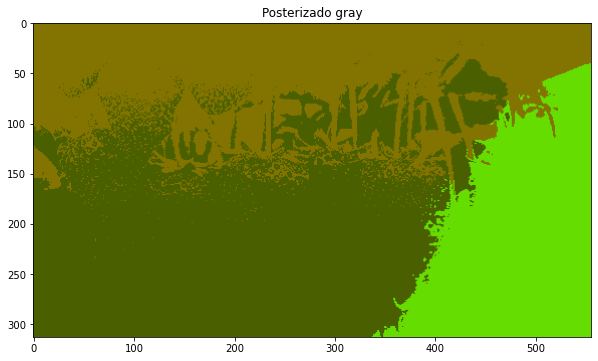

In [16]:
resultado_gray = clusters_gray[label_gray.flatten()]
resultado_gray = resultado_gray.reshape((cord_gray_xy.shape))
figura = plt.figure(figsize = (10,10))
ax = figura.add_subplot(1, 1, 1)
ax.imshow(resultado_gray,cmap='gray')
ax.set_title('Posterizado gray'.format(resultado_gray))